In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.display.max_columns = 100

train = pd.read_csv("/kaggle/input/tabular-playground-series-may-2021/train.csv")
test = pd.read_csv("/kaggle/input/tabular-playground-series-may-2021/test.csv")
train.head()

# **1. EDA**

**1.1. Read Data and First Look**

In [ ]:
print("Columns in train data")
print("-"*23)
print(train.columns)
print('-'*100)
print("Columns in test data")
print("-"*23)
print(test.columns)

In [ ]:
print('Datatypes of Train dataset:\n', train.info())
print('-'*50)
print('\n\nDatatypes of Train dataset:\n', test.info())

**1.3. Target Distribution**

In [ ]:
target_counts = train["target"].value_counts(dropna=False).to_frame().reset_index(drop=False).sort_values(by="index").reset_index(drop=True)
target_counts.rename(columns = {'target' : 'count'}, inplace = True)
target_counts.rename(columns = {'index' : 'target'}, inplace = True)
target_counts["percentage"] = target_counts["count"] / target_counts["count"].sum()

sns.barplot(data=target_counts, x="target", y="count")
display(target_counts)

**1.4. Exploring Features (Train vs Test)**

In [ ]:
# Saving all features to all_features list.
all_features=[]
for i in range(0,50):
    all_features.append("feature_" + str(i))

In [ ]:
def feature_explorer(train,test):
    
    count_train = []
    mean_train = []
    std_train = []
    min_train = []
    max_train = []
    sum_train = []
    zero_train = []
    nunique_train = []
    count_test = []
    mean_test = []
    std_test = []
    min_test = []
    max_test = []
    sum_test = []
    zero_test = []
    nunique_test = []


    for feature in all_features:
        count_train.append(train[feature].count())
        nunique_train.append(train[feature].nunique())
        mean_train.append(train[feature].mean())
        std_train.append(train[feature].std())
        min_train.append(train[feature].min())
        max_train.append(train[feature].max())
        sum_train.append(train[feature].sum())
        zero_train.append(train[train[feature]==0][feature].count()/len(train))

        count_test.append(test[feature].count())
        nunique_test.append(test[feature].nunique())
        mean_test.append(test[feature].mean())
        std_test.append(test[feature].std())
        min_test.append(test[feature].min())
        max_test.append(test[feature].max())
        sum_test.append(test[feature].sum())
        zero_test.append(test[test[feature]==0][feature].count()/len(test))
        
    info_df = pd.DataFrame({"count_train":count_train,"count_test":count_test,
                         "nunique_train":nunique_train,"nunique_test":nunique_test,
                         "mean_train":mean_train,"mean_test":mean_test,
                         "std_train":std_train,"std_test":std_test,
                         "min_train":min_train,"min_test":min_test,
                         "max_train":max_train,"max_test":max_test,
                         "zero_ratio_train":zero_train,"zero_ratio_test":zero_test}, index=all_features)
    display(info_df.style.bar(subset=['nunique_train',"nunique_test"], color=px.colors.qualitative.Pastel2[0]).bar(subset=['mean_train',"mean_test"], color=px.colors.qualitative.Safe[0]).background_gradient(subset=["std_train","std_test"], cmap='Greens').bar(subset=['zero_ratio_train',"zero_ratio_test"], color=px.colors.qualitative.Light24[0], vmin=0,vmax=1))

In [ ]:
feature_explorer(train,test)

**1.5. Exploring Features by Each Class (Class_1 vs Class_2 vs Class_3 vs Class4)**

In [ ]:
def feature_explorer_2(train):
    
    count_1 = []
    count_2 = []
    count_3 = []
    count_4 = []
    nunique_1 = []
    nunique_2 = []
    nunique_3 = []
    nunique_4 = []
    mean_1 = []
    mean_2 = []
    mean_3 = []
    mean_4 = []
    std_1 = []
    std_2 = []
    std_3 = []
    std_4 = []
    zero_1 = []
    zero_2 = []
    zero_3 = []
    zero_4 = []


    for feature in all_features:
        count_1.append(train[train["target"]=="Class_1"][feature].count()/len(train))
        count_2.append(train[train["target"]=="Class_2"][feature].count()/len(train))
        count_3.append(train[train["target"]=="Class_3"][feature].count()/len(train))
        count_4.append(train[train["target"]=="Class_4"][feature].count()/len(train))
        
        nunique_1.append(train[train["target"]=="Class_1"][feature].nunique())
        nunique_2.append(train[train["target"]=="Class_2"][feature].nunique())
        nunique_3.append(train[train["target"]=="Class_3"][feature].nunique())
        nunique_4.append(train[train["target"]=="Class_4"][feature].nunique())
        
        mean_1.append(train[train["target"]=="Class_1"][feature].mean())
        mean_2.append(train[train["target"]=="Class_2"][feature].mean())
        mean_3.append(train[train["target"]=="Class_3"][feature].mean())
        mean_4.append(train[train["target"]=="Class_4"][feature].mean())

        std_1.append(train[train["target"]=="Class_1"][feature].std())
        std_2.append(train[train["target"]=="Class_2"][feature].std())
        std_3.append(train[train["target"]=="Class_3"][feature].std())
        std_4.append(train[train["target"]=="Class_4"][feature].std())
        
        zero_1.append(train[(train["target"]=="Class_1")&(train[feature]==0)][feature].count()/len(train[train["target"]=="Class_1"]))
        zero_2.append(train[(train["target"]=="Class_2")&(train[feature]==0)][feature].count()/len(train[train["target"]=="Class_2"]))
        zero_3.append(train[(train["target"]=="Class_3")&(train[feature]==0)][feature].count()/len(train[train["target"]=="Class_3"]))
        zero_4.append(train[(train["target"]=="Class_4")&(train[feature]==0)][feature].count()/len(train[train["target"]=="Class_4"]))

        
    info_df = pd.DataFrame({"count_1":count_1,"count_2":count_2,"count_3":count_3,"count_4":count_4,
                         "nunique_1":nunique_1,"nunique_2":nunique_2,"nunique_3":nunique_3,"nunique_4":nunique_4,
                         "mean_1":mean_1,"mean_2":mean_2,"mean_3":mean_3,"mean_4":mean_4,
                         "std_1":std_1,"std_2":std_2,"std_3":std_3,"std_4":std_4,
                         "zero_1":zero_1,"zero_2":zero_2,"zero_3":zero_3,"zero_4":zero_4}, index=all_features)
    display(info_df.style.background_gradient(subset=["count_1","count_2","count_3","count_4",], cmap='Greys', vmin=0, vmax=1).bar(subset=['nunique_1',"nunique_2","nunique_3","nunique_4"], color=px.colors.qualitative.Pastel2[0]).bar(subset=['mean_1','mean_2','mean_3','mean_4'], color=px.colors.qualitative.Safe[0]).background_gradient(subset=["std_1","std_2","std_3","std_4",], cmap='Greens').bar(subset=['zero_1',"zero_2","zero_3","zero_4"], color=px.colors.qualitative.Light24[0], vmin=0,vmax=1))

In [ ]:
feature_explorer_2(train)

**1.6. Outliers**

In [ ]:
plt.figure(figsize=(18,25))
sns.boxplot(data=train[all_features], orient="h")
plt.title("Train Set")

In [ ]:
plt.figure(figsize=(18,25))
sns.boxplot(data=test[all_features], orient="h")
plt.title("Test Set")

# **2. Modeling**

**2.1. Catboost**

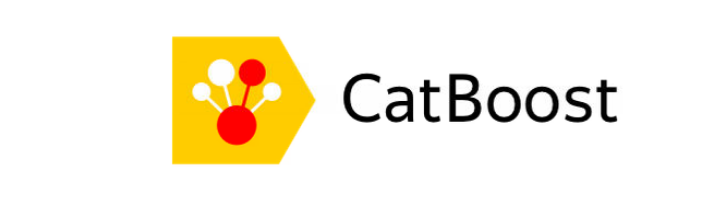

In [ ]:
# Importing Catboost and sklearn libraries.
from catboost import Pool, CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

# Reading datasets.
train = pd.read_csv("/kaggle/input/tabular-playground-series-may-2021/train.csv")
test = pd.read_csv("/kaggle/input/tabular-playground-series-may-2021/test.csv")
submission = pd.read_csv("/kaggle/input/tabular-playground-series-may-2021/sample_submission.csv")

# Saving all features to all_features list.
all_features=[]
for i in range(0,50):
    all_features.append("feature_" + str(i))

    
# Converting all features to string.
for column in all_features:
    train[column] = train[column].astype(str)
    test[column] = test[column].astype(str)
    
    
# Removing records which are not appear in test set from train set.
train_have_test_dont_have = {}
for feature in all_features:
    value = list(set(list(train[feature].unique())) - set(list(test[feature].unique())))
    train_have_test_dont_have.update({feature:value})

for feature,value in train_have_test_dont_have.items():
    train = train[~(train[feature].isin(value))]
train.reset_index(inplace=True)
print(train.shape)

In [ ]:
# Defining a function that uses catboost with 10 fold and shows the validation scores for each fold and all folds.
def train_catboost_model(df, columns, categoric_columns, random_state, n_splits):

    models = {}
    logloss_all = []
    folds = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)  
    X_train = df[columns]
    y_train = df['target']
    feature_importance = pd.DataFrame(columns=["column","importance"])
    validation_set = pd.DataFrame()
    
    # Building the models.
    for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X_train,  y_train)):
        print("Fold --> " + str(n_fold+1) + "/" + str(n_splits))
        train_X, train_y = X_train.iloc[train_idx].copy(), y_train.iloc[train_idx]
        valid_X, valid_y = X_train.iloc[valid_idx].copy(), y_train.iloc[valid_idx]
        dataset = Pool(train_X, train_y, categoric_columns)
        evalset = Pool(valid_X, valid_y, categoric_columns)
        model = CatBoostClassifier(
            task_type="GPU",
            depth=4,
            iterations=10000,
            od_wait=1000,
            od_type='Iter',
            learning_rate=0.02,
            use_best_model=True,
            loss_function='MultiClass'
            )

        model.fit(dataset, plot=False, verbose=500, eval_set=evalset)
        models.update({"model"+str(n_fold+1):model})
        
        
        # Validation Prediction
        validation_logloss=[]

        _proba = model.predict_proba(valid_X[all_features])
        valid_X.reset_index(inplace=True,drop=True)
        valid_X["Class_1"] = _proba[:,0]
        valid_X["Class_2"] = _proba[:,1]
        valid_X["Class_3"] = _proba[:,2]
        valid_X["Class_4"] = _proba[:,3]

    
        validation_predictions = []
        for i in range(0,valid_X.shape[0]):
            validation_predictions.append(list(valid_X.iloc[i][["Class_1","Class_2","Class_3","Class_4"]])) 
        
        valid_y.reset_index(drop=True,inplace=True)
        valid_X["target"] = valid_y
        validation_set = validation_set.append(valid_X,ignore_index=True)
    
        logloss_of_fold = log_loss(list(valid_y),validation_predictions)
        logloss_all.append(logloss_of_fold)
        print("logloss of validation for " + "Fold --> " + str(n_fold+1) + " --> " + str(log_loss(list(valid_y),validation_predictions)))
        print("-"*120)
    
        # Feature Importance
        feature_importance_fold = pd.DataFrame({'column': X_train.columns , 'importance': model.feature_importances_})
        feature_importance = feature_importance.append(feature_importance_fold,ignore_index=True)
        
    feature_importance = feature_importance.groupby(["column"]).mean().reset_index(drop=False)
    feature_importance.sort_values(['importance', 'column'], ascending=[False, True], inplace=True)
    feature_importance.reset_index(inplace=True,drop=True)
    
    # Logloss Calculation of all models.
    print("LOGLOSS OF VALIDATION OF ALL --> " + str(sum(logloss_all)/len(logloss_all)))
    
    
    return validation_set,models,feature_importance

In [ ]:
validation_set,models,feature_importance = train_catboost_model(df=train, columns=all_features, categoric_columns=all_features, random_state=33, n_splits=10)

In [ ]:
plt.figure(figsize=(15,30))
ax = sns.barplot(data=feature_importance, x="importance", y="column", color="b")
total = feature_importance["importance"].sum()
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
    
plt.title('Catboost Model Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')

In [ ]:
class_1_columns=[]
class_2_columns=[]
class_3_columns=[]
class_4_columns=[]
    
for model in models.keys():
    _proba = models[model].predict_proba(test[all_features])
    
    test[model+"_class1"] = _proba[:,0]
    class_1_columns.append(model+"_class1")
    
    test[model+"_class2"] = _proba[:,1]
    class_2_columns.append(model+"_class2")
    
    test[model+"_class3"] = _proba[:,2]
    class_3_columns.append(model+"_class3")
    
    test[model+"_class4"] = _proba[:,3]
    class_4_columns.append(model+"_class4")
    
test["Class_1"] = test[class_1_columns].apply(np.mean,axis=1)
test["Class_2"] = test[class_2_columns].apply(np.mean,axis=1)
test["Class_3"] = test[class_3_columns].apply(np.mean,axis=1)
test["Class_4"] = test[class_4_columns].apply(np.mean,axis=1)
    

submission['Class_1'] = test['Class_1']
submission['Class_2'] = test['Class_2']
submission['Class_3'] = test['Class_3']
submission['Class_4'] = test['Class_4']
catboost = submission.copy()
catboost.head()

**2.2. LightAutoML**

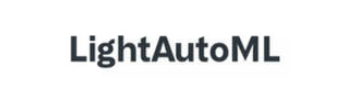

In [ ]:
pip install -U lightautoml

In [ ]:
# Importing LightAutoML library and LabelEncoder from sklearn.
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from sklearn.preprocessing import LabelEncoder

# Reading datasets.
train = pd.read_csv("/kaggle/input/tabular-playground-series-may-2021/train.csv")
test = pd.read_csv("/kaggle/input/tabular-playground-series-may-2021/test.csv")
submission = pd.read_csv("/kaggle/input/tabular-playground-series-may-2021/sample_submission.csv")


# Label Encoding the target variable.
le = LabelEncoder()
train["target"] = le.fit_transform(train["target"])

In [ ]:
# Running LightAutoML

N_THREADS = 8 # threads cnt for lgbm and linear models
N_FOLDS = 5 # folds cnt for AutoML
RANDOM_STATE = 33 # fixed random state for various reasons
TEST_SIZE = 0.2 # Test size for metric check
TIMEOUT = 3600 * 4 # Time in seconds for automl run


task = Task('multiclass',)

roles = {
    'target': "target",
    'drop': ['id'],
}


automl = TabularUtilizedAutoML(task = task, 
                               timeout = TIMEOUT,
                               cpu_limit = N_THREADS,
                               reader_params = {'n_jobs': N_THREADS},
)

oof_pred = automl.fit_predict(train, roles = roles)
print('oof_pred:\n{}\nShape = {}'.format(oof_pred[:10], oof_pred.shape))

In [ ]:
# Fast feature importances calculation
fast_fi = automl.get_feature_scores('fast', silent = False)
fast_fi.set_index('Feature')['Importance'].plot.bar(figsize = (20, 10), grid = True)

In [ ]:
# Prediction with LightAutoML
test_pred = automl.predict(test)
print('Prediction for test set:\n{}\nShape = {}'.format(test_pred[:10], test_pred.shape))

print('Check scores...')
print('OOF score: {}'.format(log_loss(train["target"].values, oof_pred.data)))


submission.iloc[:, 1:] = test_pred.data
lightautoml = submission.copy()

# **3. Submission**

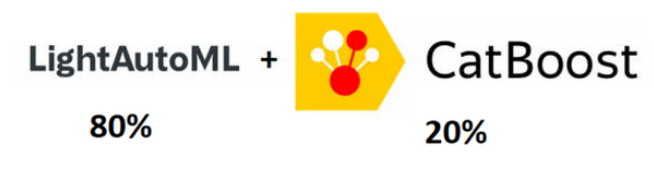

In [ ]:
catboost.rename(columns = {'Class_1' : 'catboost_Class_1'}, inplace = True)
catboost.rename(columns = {'Class_2' : 'catboost_Class_2'}, inplace = True)
catboost.rename(columns = {'Class_3' : 'catboost_Class_3'}, inplace = True)
catboost.rename(columns = {'Class_4' : 'catboost_Class_4'}, inplace = True)
lightautoml.rename(columns = {'Class_1' : 'light_Class_1'}, inplace = True)
lightautoml.rename(columns = {'Class_2' : 'light_Class_2'}, inplace = True)
lightautoml.rename(columns = {'Class_3' : 'light_Class_3'}, inplace = True)
lightautoml.rename(columns = {'Class_4' : 'light_Class_4'}, inplace = True)

lightautoml_and_catboost = pd.merge(left=catboost, right=lightautoml, left_on="id", right_on="id", how="left")

lightautoml_and_catboost["Class_1"] = (lightautoml_and_catboost["light_Class_1"] * 0.80) + (lightautoml_and_catboost["catboost_Class_1"] * 0.20)
lightautoml_and_catboost["Class_2"] = (lightautoml_and_catboost["light_Class_2"] * 0.80) + (lightautoml_and_catboost["catboost_Class_2"] * 0.20)
lightautoml_and_catboost["Class_3"] = (lightautoml_and_catboost["light_Class_3"] * 0.80) + (lightautoml_and_catboost["catboost_Class_3"] * 0.20)
lightautoml_and_catboost["Class_4"] = (lightautoml_and_catboost["light_Class_4"] * 0.80) + (lightautoml_and_catboost["catboost_Class_4"] * 0.20)

lightautoml_and_catboost = lightautoml_and_catboost[["id","Class_1","Class_2","Class_3","Class_4"]]
lightautoml_and_catboost.to_csv("lightautoml_and_catboost.csv", index=False)

print(lightautoml_and_catboost.shape)
lightautoml_and_catboost